In [22]:
import pandas as pd
import numpy as np
import gensim.models.word2vec as w2v
import multiprocessing
import os
import re
import pprint
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import sklearn.manifold

In [75]:
songs = pd.read_csv("../datasets/songdata.csv", header=0)
#songs.head()
songs = songs[songs.artist != 'Lata Mangeshkar']
songs.head()

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \nAnd..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \nTouch me gentl..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \nWhy I had t...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...


In [33]:
arts_list = songs['artist'].unique()
print(len(arts_list))

642


In [48]:
my_arts=['The Beatles','Maroon 5','Lana Del Rey','Chris Brown','Green Day','David Guetta','Ellie Goulding','Ed Sheeran']

In [89]:
text_lenght = [0]*(len(my_arts))                                 # creating the subtable
my_lyrics = songs[songs.artist =='Maroon 5']
text_lenght[0] = len(my_lyrics)

for i in range(0, len(my_arts)):
    text_lenght[i]= len(songs[songs['artist']==my_arts[i]]['text'])
    my_lyrics = my_lyrics.append(songs[songs.artist ==my_arts[i]])
    i+=1

print(text_lenght)                               # Number of songs per chosen artist  
print(len(my_lyrics))  

[178, 110, 113, 145, 174, 63, 77, 53]
1023


,artist,song,link,text
12520,Maroon 5,Can't Stop,/m/maroon+5/cant+stop_20419103.html,All alone in my room think of you at a rate th...
12521,Maroon 5,Harder To Breathe,/m/maroon+5/harder+to+breathe_20089506.html,How dare you say that my behavior is unaccepta...
12522,Maroon 5,Highway To Hell,/m/maroon+5/highway+to+hell_10175468.html,"Living easy, livin' free \nSeason ticket, on ..."
12523,Maroon 5,If I Fell,/m/maroon+5/if+i+fell_10175467.html,If I fell in love with you \nWould you promis...
12524,Maroon 5,If You Only Knew,/m/maroon+5/if+you+only+knew_10175490.html,I wake up \nThoughts of you \nTattooed to my...


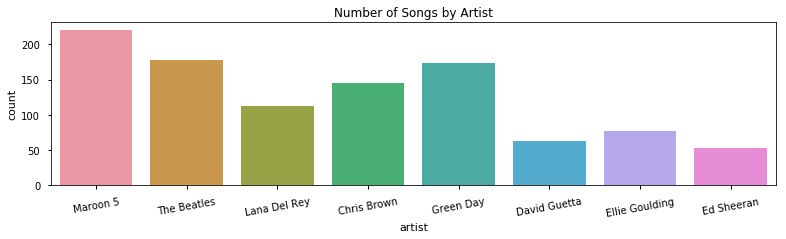

In [90]:
sns.set_context("notebook", font_scale=1.0)
sns.set_palette('cubehelix',4)         
plt.figure(figsize=(13,3))
plt.title('Number of Songs by Artist')
g = sns.countplot(my_lyrics['artist'])
rotg = g.set_xticklabels(g.get_xticklabels(), rotation=10)                                        
my_lyrics.head()

In [91]:
print(arts_list[:10])

['ABBA' 'Ace Of Base' 'Adam Sandler' 'Adele' 'Aerosmith' 'Air Supply'
 'Aiza Seguerra' 'Alabama' 'Alan Parsons Project' 'Aled Jones']


In [93]:
from io import StringIO
warray = [['']]*100                   # Picking lists of most favorite words by artist
fav_words = [['']]*100
word_cnt = [0]*100
tfidf = TfidfVectorizer(norm='l2', use_idf=True, smooth_idf=True, stop_words='english')
i=0                                                    
for artist, sngs in my_lyrics.groupby('artist'):
    my_texts = songs[songs['artist']==my_arts[i]]['text']
    tfidf.fit_transform(my_texts)
    cnt = np.sum(tfidf.transform(sngs['text']).toarray(), axis=0)
    warray[i] = tfidf.get_feature_names()
    word_cnt[i] = len(warray[i])
    sort_freq = np.argsort(cnt.flatten())[::-1]   
    fav_words[i] = [tfidf.get_feature_names()[idx] for idx in sort_freq.tolist()[:40]]
    print(my_arts[i], "has the most favorite words :",fav_words[i],
         'and the number of unique words in all songs is:', word_cnt[i])
    i+=1 

The Beatles has the most favorite words : ['girl', 'wanna', 'don', 'love', 'chorus', 'like', 'baby', 'know', 'cause', 'just', 'got', 'let', 'need', 'ya', 'ain', 'oh', 'yeah', 'gotta', 'want', 'make', 'll', 'body', 'right', 'heart', 'tell', 'say', 'brown', 'way', 'come', 'think', 'time', 'man', 'money', 'bout', 'look', 'bad', 'life', 'gonna', 'hey', 'did'] and the number of unique words in all songs is: 2028
Maroon 5 has the most favorite words : ['love', 'wanna', 'let', 'don', 'party', 'got', 'oh', 'dance', 'hear', 'just', 'hey', 'baby', 'yeah', 'make', 'like', 'feel', 'chorus', 'people', 'know', 'world', 'come', 'won', 'll', 'night', 'lights', 've', 'money', 'believe', 'right', 'hands', 'gotta', 'music', 'floor', 'way', 'life', 'bang', 'girl', 'live', 'tonight', 'say'] and the number of unique words in all songs is: 1803
Lana Del Rey has the most favorite words : ['ll', 'love', 'oh', 'home', 'just', 'like', 'know', 'let', 'eyes', 'come', 'away', 'hold', 'heart', 'don', 'long', 'feel',

In [101]:
print (text_lenght)
print (len(my_lyrics))
print(my_lyrics.iloc[200])

[178, 110, 113, 145, 174, 63, 77, 53]
1023
artist                                          The Beatles
song                             Got To Get It Into My Life
link      /b/beatles/got+to+get+it+into+my+life_20015074...
text      I was alone, I took a ride  \nI didn't know wh...
Name: 24743, dtype: object


In [98]:
comb_texts = ['']*1            # concatenated texts of all songs by the artist
comb_length = [0]*1
i=0
j=0
mn=0
while (i!=len(my_lyrics)):
    print (i,j)
    comb_texts[j] += (my_lyrics.iloc[i]['text'])
    if (i == text_lenght[j]+ mn ):
        mn+=text_lenght[j]
        j+=1
    i+=1 
for l in range (0,7):
    comb_length[l] = len(comb_texts[l])    
print(comb_length)    

0 0
1 0
2 0
3 0
4 0
5 0
6 0
7 0
8 0
9 0
10 0
11 0
12 0
13 0
14 0
15 0
16 0
17 0
18 0
19 0
20 0
21 0
22 0
23 0
24 0
25 0
26 0
27 0
28 0
29 0
30 0
31 0
32 0
33 0
34 0
35 0
36 0
37 0
38 0
39 0
40 0
41 0
42 0
43 0
44 0
45 0
46 0
47 0
48 0
49 0
50 0
51 0
52 0
53 0
54 0
55 0
56 0
57 0
58 0
59 0
60 0
61 0
62 0
63 0
64 0
65 0
66 0
67 0
68 0
69 0
70 0
71 0
72 0
73 0
74 0
75 0
76 0
77 0
78 0
79 0
80 0
81 0
82 0
83 0
84 0
85 0
86 0
87 0
88 0
89 0
90 0
91 0
92 0
93 0
94 0
95 0
96 0
97 0
98 0
99 0
100 0
101 0
102 0
103 0
104 0
105 0
106 0
107 0
108 0
109 0
110 0
111 0
112 0
113 0
114 0
115 0
116 0
117 0
118 0
119 0
120 0
121 0
122 0
123 0
124 0
125 0
126 0
127 0
128 0
129 0
130 0
131 0
132 0
133 0
134 0
135 0
136 0
137 0
138 0
139 0
140 0
141 0
142 0
143 0
144 0
145 0
146 0
147 0
148 0
149 0
150 0
151 0
152 0
153 0
154 0
155 0
156 0
157 0
158 0
159 0
160 0
161 0
162 0
163 0
164 0
165 0
166 0
167 0
168 0
169 0
170 0
171 0
172 0
173 0
174 0
175 0
176 0
177 0
178 0
179 1


IndexError: list index out of range

In [3]:
text_corpus = []
for song in songs['text']:
    words = song.lower().split()
    text_corpus.append(words)



# Dimensionality of the resulting word vectors.
#more dimensions, more computationally expensive to train
#but also more accurate
#more dimensions = more generalized
num_features = 50
# Minimum word count threshold.
min_word_count = 1

# Number of threads to run in parallel.
#more workers, faster we train
num_workers = multiprocessing.cpu_count()

# Context window length.
context_size = 7


downsampling = 1e-1

# Seed for the RNG, to make the results reproducible.
#random number generator
#deterministic, good for debugging
seed = 1

songs2vec = w2v.Word2Vec(
    sg=1,
    seed=seed,
    workers=num_workers,
    size=num_features,
    min_count=min_word_count,
    window=context_size,
    sample=downsampling
)

songs2vec.build_vocab(text_corpus)
print (len(text_corpus))

57618


In [12]:
print (text_corpus[0])

['look', 'at', 'her', 'face,', "it's", 'a', 'wonderful', 'face', 'and', 'it', 'means', 'something', 'special', 'to', 'me', 'look', 'at', 'the', 'way', 'that', 'she', 'smiles', 'when', 'she', 'sees', 'me', 'how', 'lucky', 'can', 'one', 'fellow', 'be?', "she's", 'just', 'my', 'kind', 'of', 'girl,', 'she', 'makes', 'me', 'feel', 'fine', 'who', 'could', 'ever', 'believe', 'that', 'she', 'could', 'be', 'mine?', "she's", 'just', 'my', 'kind', 'of', 'girl,', 'without', 'her', "i'm", 'blue', 'and', 'if', 'she', 'ever', 'leaves', 'me', 'what', 'could', 'i', 'do,', 'what', 'could', 'i', 'do?', 'and', 'when', 'we', 'go', 'for', 'a', 'walk', 'in', 'the', 'park', 'and', 'she', 'holds', 'me', 'and', 'squeezes', 'my', 'hand', "we'll", 'go', 'on', 'walking', 'for', 'hours', 'and', 'talking', 'about', 'all', 'the', 'things', 'that', 'we', 'plan', "she's", 'just', 'my', 'kind', 'of', 'girl,', 'she', 'makes', 'me', 'feel', 'fine', 'who', 'could', 'ever', 'believe', 'that', 'she', 'could', 'be', 'mine?', 

In [14]:
tot_ex= (sum(len(ix) for ix in text_corpus))

In [27]:
import time
start_time = time.time()



songs2vec.train(text_corpus,total_examples =songs2vec.corpus_count, epochs = songs2vec.iter)

if not os.path.exists("trained"):
    os.makedirs("trained")

songs2vec.save(os.path.join("trained", "songs2vectors.w2v"))

print("--- %s seconds ---" % (time.time() - start_time))

--- 180.98715209960938 seconds ---


In [28]:
songs2vec = w2v.Word2Vec.load(os.path.join("trained", "songs2vectors.w2v"))

In [29]:
print(songs2vec['un-right'])
def songVector(row):
    vector_sum = 0
    words = row.lower().split()
    for word in words:
        vector_sum = vector_sum + songs2vec[word]
    vector_sum = vector_sum.reshape(1,-1)
    normalised_vector_sum = sklearn.preprocessing.normalize(vector_sum)
    return normalised_vector_sum


import time
start_time = time.time()

songs['song_vector'] = songs['text'].apply(songVector)



[ 0.36357963  0.14492922 -0.13141006  0.04157248 -0.31934988  0.34402964
 -0.05187371 -0.20116128  0.07159739  0.00842176 -0.19197473  0.27373326
 -0.23446009  0.08384712  0.03460133 -0.19429687 -0.20496611 -0.15931091
 -0.18649688 -0.04793458 -0.31259686 -0.16131137  0.36541533 -0.01858622
  0.26126283 -0.24905561  0.11097184 -0.27640489 -0.08281633  0.09444261
  0.05244353 -0.13970432 -0.18462898 -0.59063923  0.23117559 -0.14995064
  0.39363873  0.10374349 -0.20914063  0.17596227  0.01373307  0.23624729
  0.06064432 -0.02159529 -0.3110829  -0.05837183  0.26023817 -0.00235255
  0.07917432  0.17727606]


In [30]:
song_vectors = []
from sklearn.model_selection import train_test_split

train, test = train_test_split(songs, test_size = 0.9)


for song_vector in train['song_vector']:
    song_vectors.append(song_vector)

train.head(10)



,artist,song,link,text,song_vector
33284,Gary Numan,For The Rest Of My Life,/g/gary+numan/for+the+rest+of+my+life_20982011...,Look around. Do you see? \nEverything is fadi...,"[[0.156944, 0.236355, -0.0103657, -0.067609, -..."
50057,Ramones,Roots Of Hatred,/r/ramones/roots+of+hatred_20604287.html,I know your everything \nWell I know those ta...,"[[0.112186, 0.175088, -0.0689293, -0.123626, -..."
54958,Venom,Crucified,/v/venom/crucified_20533732.html,Chain him jail him judge and crucify find him ...,"[[0.0399557, 0.187464, -0.0626211, -0.0107353,..."
1833,Boney M.,Zion's Daughter,/b/boney+m/zions+daughter_10045443.html,"Zion's daughter, now your heart is full of joy...","[[0.034231, 0.256499, -0.123876, -0.0686313, -..."
11065,Kylie Minogue,Light Years,/k/kylie+minogue/light+years_20080967.html,"10, 9, 8, 7, 6, 5, 4, 3, 2, 1 \nListen can yo...","[[0.0983868, 0.205882, -0.000218662, -0.106616..."
48483,Pink Floyd,Wearing The Inside Out,/p/pink+floyd/wearing+the+inside+out_20108642....,From morning to night I stayed out of sight \...,"[[0.125876, 0.211832, -0.0734553, -0.0698952, ..."
36058,Hollies,Burn Out,/h/hollies/burn+out_20065572.html,Jimmy's outside with his motor engine hummin' ...,"[[0.182893, 0.129759, -0.0283153, -0.107497, -..."
31110,Ellie Goulding,Sleepyhead,/e/ellie+goulding/sleepyhead_20896396.html,And you said \nIt was like fire around the br...,"[[0.0817404, 0.152254, -0.0762483, -0.051139, ..."
2096,Bryan White,Between Now And Forever,/b/bryan+white/between+now+forever_20025768.html,I can't believe that I've found you \nFate di...,"[[0.16891, 0.237322, -0.000558105, -0.113921, ..."
45616,Nick Cave,The Kindness Of Strangers,/n/nick+cave/the+kindness+of+strangers_2010005...,They found mary bellows cuffed to the bed \nW...,"[[0.060987, 0.164872, -0.151446, -0.0506397, -..."


In [31]:


X = np.array(song_vectors).reshape((5761, 50))

start_time = time.time()
tsne = sklearn.manifold.TSNE(n_components=2, n_iter=250, random_state=0, verbose=2)

all_word_vectors_matrix_2d = tsne.fit_transform(X)

print("--- %s seconds ---" % (time.time() - start_time))

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5761 samples in 0.012s...
[t-SNE] Computed neighbors for 5761 samples in 3.310s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5761
[t-SNE] Computed conditional probabilities for sample 2000 / 5761
[t-SNE] Computed conditional probabilities for sample 3000 / 5761
[t-SNE] Computed conditional probabilities for sample 4000 / 5761
[t-SNE] Computed conditional probabilities for sample 5000 / 5761
[t-SNE] Computed conditional probabilities for sample 5761 / 5761
[t-SNE] Mean sigma: 0.072915
[t-SNE] Computed conditional probabilities in 0.446s
[t-SNE] Iteration 50: error = 87.3975906, gradient norm = 0.0344786 (50 iterations in 10.752s)
[t-SNE] Iteration 100: error = 87.1440964, gradient norm = 0.0314007 (50 iterations in 8.802s)
[t-SNE] Iteration 150: error = 87.1278534, gradient norm = 0.0384258 (50 iterations in 7.659s)
[t-SNE] Iteration 200: error = 87.0412064, gradient norm = 0.0157704 (50 iterations in 8.237s)
[